In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## ***Data Loading*** 

In [41]:
df = pd.read_csv("bmw.csv")

In [42]:
print(f"Shape of dataset: {df.shape}")
print("Display the dataset")
print(df.head(5))

Shape of dataset: (10781, 9)
Display the dataset
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  


In [43]:
print(f"Dataset info: ")
print(df.info())

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB
None


In [44]:
print(f"Describe the dataset in statistical terms: ")
print(df.describe())

Describe the dataset in statistical terms: 
               year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000  


## ***Data Cleaning***

In [45]:
print("Checking for missing values in each feature : ")
print(df.isnull().sum())

Checking for missing values in each feature : 
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [51]:
print("Checking for duplicate rows")
duplicate_row = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_row}")

Checking for duplicate rows
Duplicate Rows: 117


In [52]:
if duplicate_row > 0:
    df = df.drop_duplicates()
    print(f"After removing the duplicates: {df.shape[0]} rows")

After removing the duplicates: 10664 rows


In [53]:
print("Checking for data types")
print(df.dtypes)

Checking for data types
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


## ***Exploratory Data Analysis***

In [54]:
print("Target Variable (Price) Statistics")
print(df['price'].describe())

Target Variable (Price) Statistics
count     10664.000000
mean      22692.888691
std       11434.921030
min        1200.000000
25%       14897.000000
50%       20261.500000
75%       27890.000000
max      123456.000000
Name: price, dtype: float64


#### **Target variable distribution**

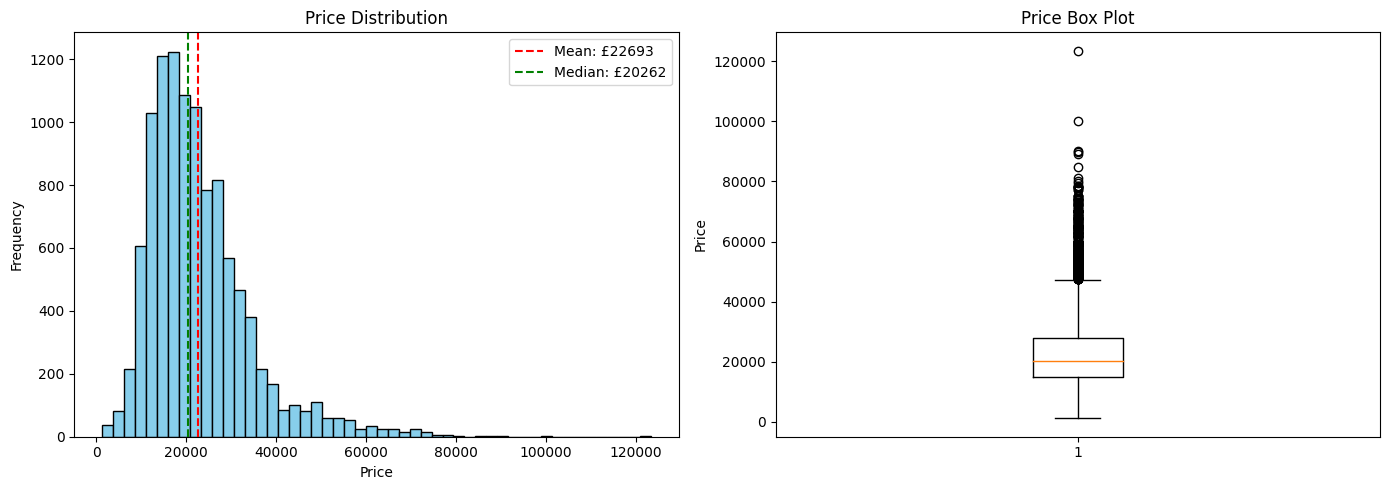

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['price'], bins=50, edgecolor='black', color='skyblue')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: £{df["price"].mean():.0f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: £{df["price"].median():.0f}')
axes[0].legend()

axes[1].boxplot(df['price'], vert=True)
axes[1].set_ylabel('Price')
axes[1].set_title('Price Box Plot')
plt.tight_layout()
plt.savefig('price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


#### **Categorical variable distribution**

Categorical Features Distribution


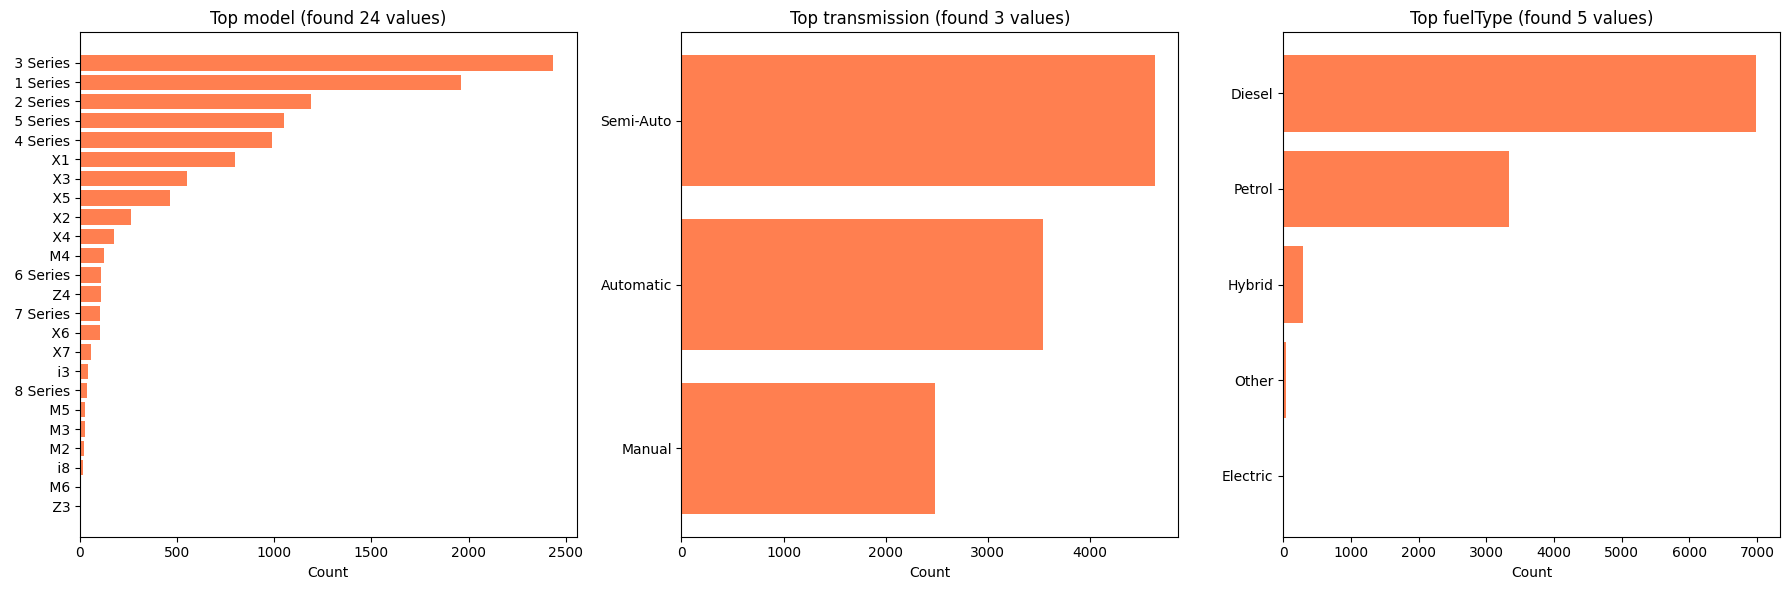

In [ ]:
print("Categorical Features Distribution")
categorical_cols = ['model', 'transmission', 'fuelType']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, col in enumerate(categorical_cols):
    counts = df[col].value_counts()

    y_range = range(len(counts))
    
    axes[idx].barh(y_range, counts.values, color='coral')
    
    axes[idx].set_yticks(y_range)
    axes[idx].set_yticklabels(counts.index)
    
    axes[idx].set_xlabel('Count')
    axes[idx].set_title(f'Top {col} (found {len(counts)} values)')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.savefig('categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

Numerical Features Analysis
year Statistics:
count    10664.000000
mean      2017.062828
std          2.350668
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2020.000000
Name: year, dtype: float64
mileage Statistics:
count     10664.000000
mean      25710.978995
std       25146.634940
min           1.000000
25%        5665.750000
50%       18783.000000
75%       38436.500000
max      214000.000000
Name: mileage, dtype: float64
mpg Statistics:
count    10664.000000
mean        56.483121
std         31.465604
min          5.500000
25%         45.600000
50%         53.300000
75%         62.800000
max        470.800000
Name: mpg, dtype: float64
engineSize Statistics:
count    10664.000000
mean         2.170161
std          0.552556
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64
tax Statistics:
count    10664.000000
mean       131.597431
std     

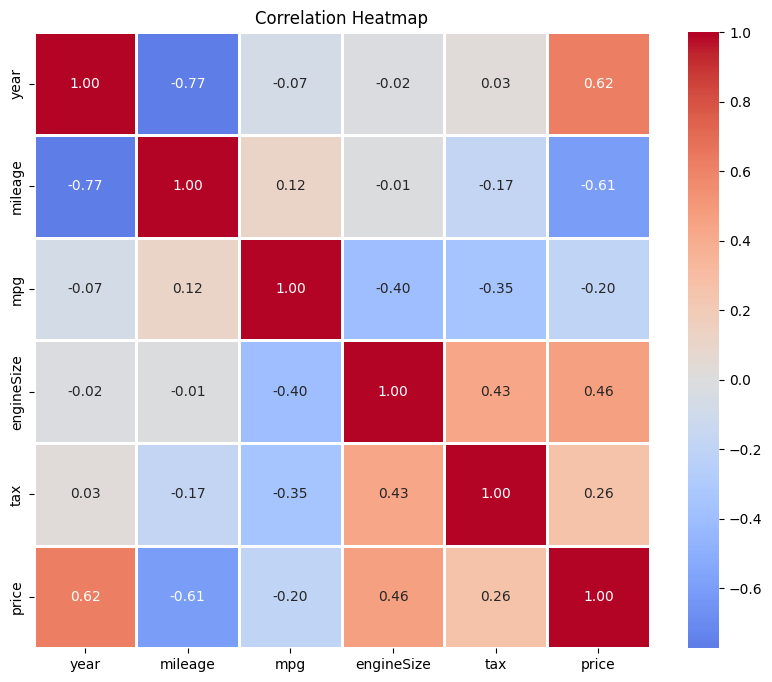

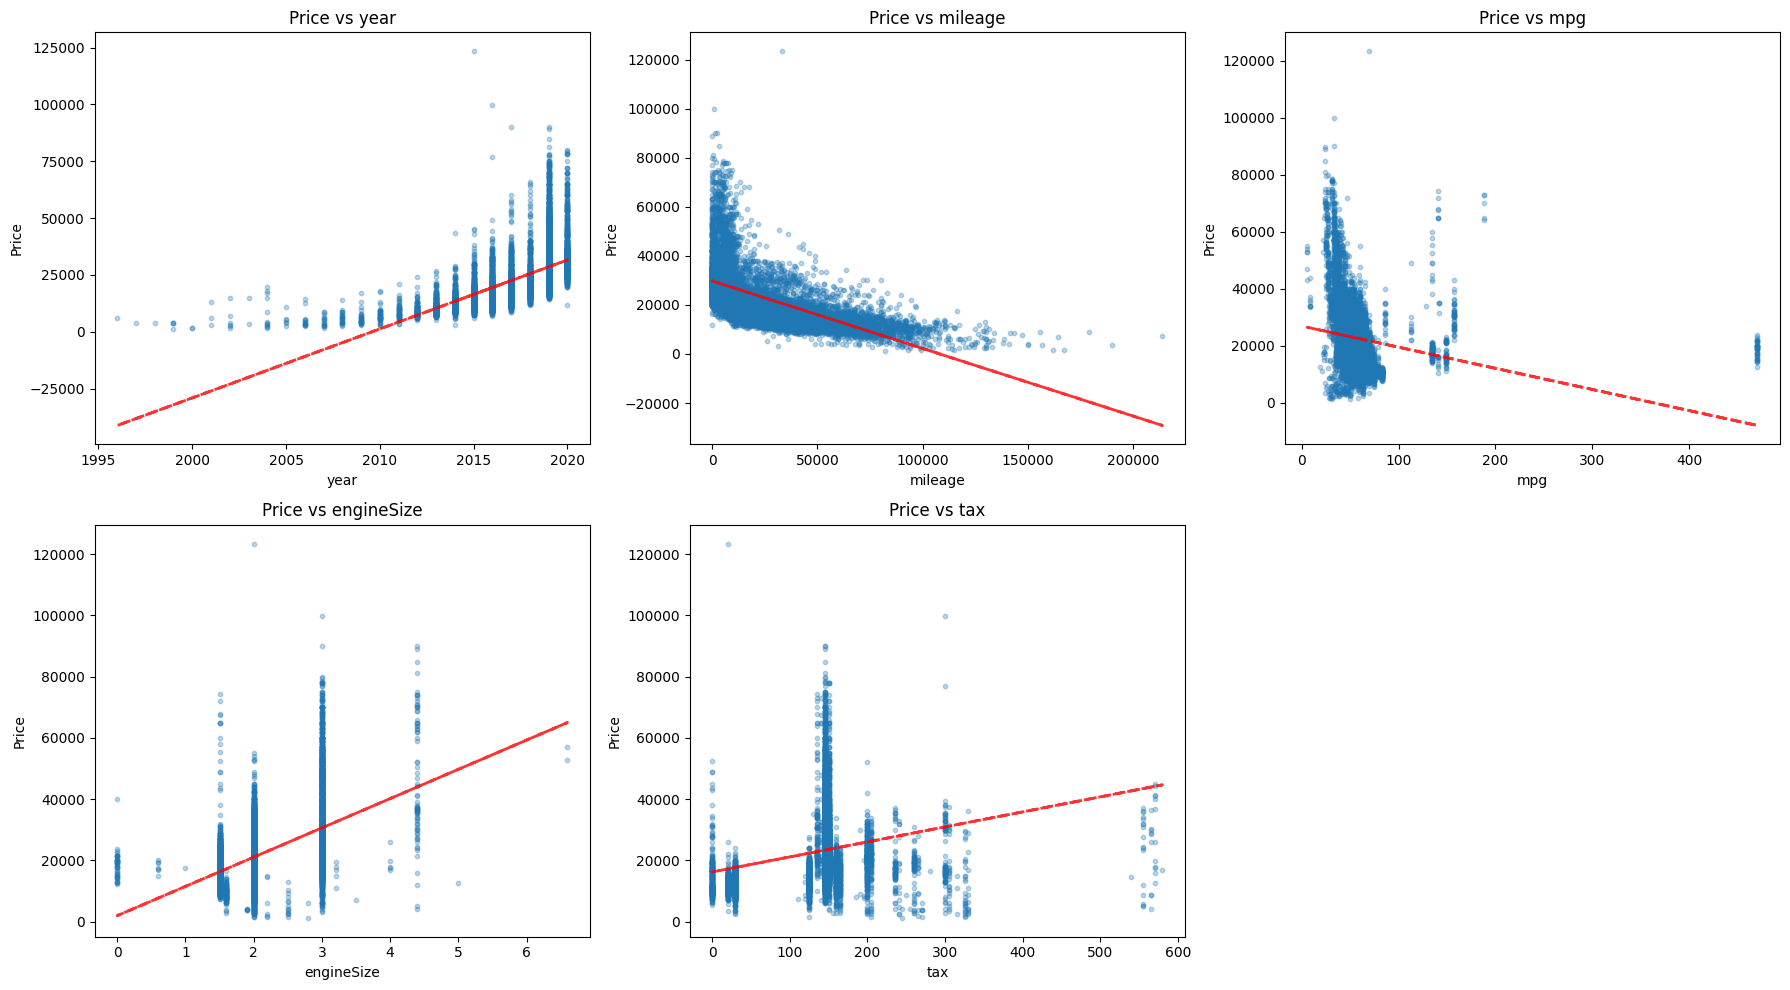

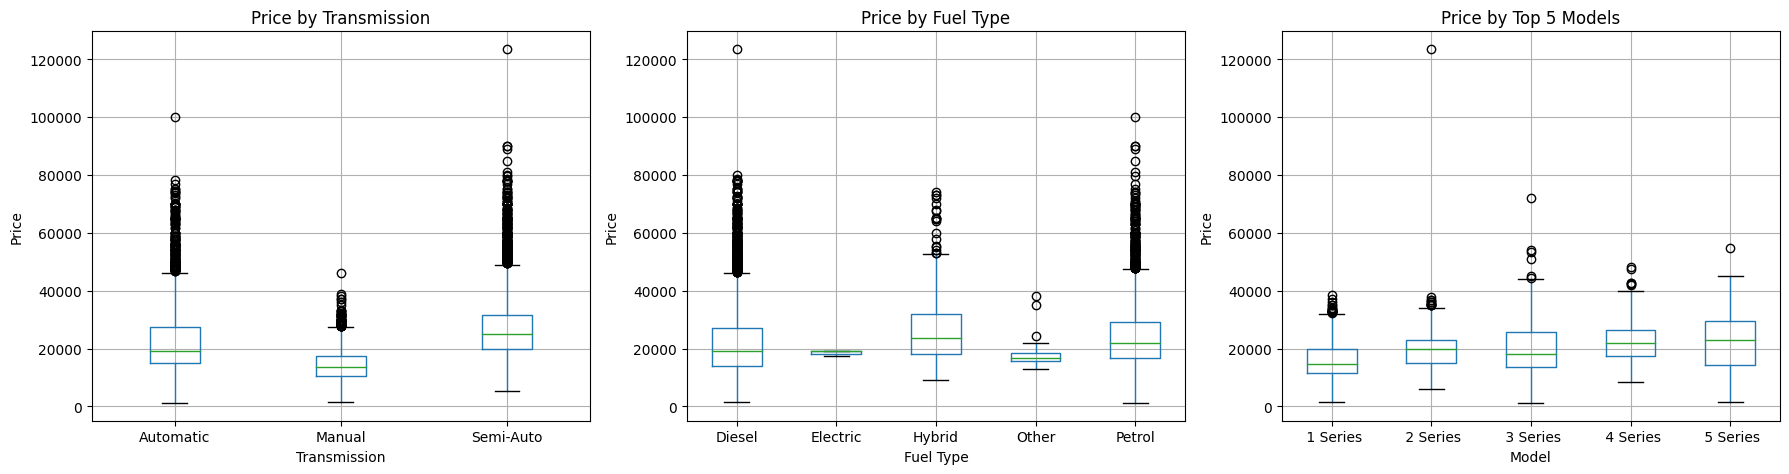

In [63]:
print("Numerical Features Analysis")
numerical_cols = ['year', 'mileage', 'mpg', 'engineSize', 'tax']

for col in numerical_cols:
    print(f"{col} Statistics:")
    print(df[col].describe())

# Correlation analysis
print("Correlation with Price")
correlations = df[numerical_cols + ['price']].corr()['price'].sort_values(ascending=False)
print(correlations)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols + ['price']].corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()




# Price vs numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].scatter(df[col], df['price'], alpha=0.3, s=10)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_title(f'Price vs {col}')
    
    # Add trend line
    z = np.polyfit(df[col], df['price'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[col], p(df[col]), "r--", alpha=0.8, linewidth=2)

fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('price_vs_features.png', dpi=300, bbox_inches='tight')
plt.show()

# Price by categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Price by transmission
df.boxplot(column='price', by='transmission', ax=axes[0])
axes[0].set_title('Price by Transmission')
axes[0].set_xlabel('Transmission')
axes[0].set_ylabel('Price')

# Price by fuel type
df.boxplot(column='price', by='fuelType', ax=axes[1])
axes[1].set_title('Price by Fuel Type')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Price')

# Price by top models
top_models = df['model'].value_counts().head(5).index
df_top_models = df[df['model'].isin(top_models)]
df_top_models.boxplot(column='price', by='model', ax=axes[2])
axes[2].set_title('Price by Top 5 Models')
axes[2].set_xlabel('Model')
axes[2].set_ylabel('Price')

plt.suptitle('')
plt.tight_layout()
plt.savefig('price_by_categories.png', dpi=300, bbox_inches='tight')
plt.show()

## ***FEATURE ENGINEERING & PREPROCESSING***

In [64]:
# Creating a copy for preprocessing
df_processed = df.copy()

In [65]:
#Feature engineering by creating a new feature with car age
df_processed['car_age'] = 2026 - df_processed['year']
print("New feature created: car_age")

New feature created: car_age


In [68]:
# Checking for outliers in price (Using IQR = Q3 -Q1)
Q1 = df_processed['price'].quantile(0.25)
Q3 = df_processed['price'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("Price outliers bounds are")
print(f"Lower Bound: £{lower_bound:.2f}")
print(f"Upper Bound: £{upper_bound:.2f}")

outliers = df_processed[(df_processed['price'] < lower_bound) | (df_processed['price'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df_processed)*100:.2f}%)")

Price outliers bounds are
Lower Bound: £-4592.50
Upper Bound: £47379.50
Number of outliers: 478 (4.48%)


In [ ]:
# Encode categorical feature 
Label_encoder = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])
    Label_encoder[col] = le
    print(f"{col}: {len(le.classes_)} unique value encoded")
    

model: 24 unique value encoded
transmission: 3 unique value encoded
fuelType: 5 unique value encoded


In [82]:
# Prepare features and target columns
feature_columns = ['year', 'mileage', 'mpg', 'engineSize', 'tax', 'car_age','model_encoded', 'transmission_encoded', 'fuelType_encoded']

X = df_processed[feature_columns]
y = df_processed['price']

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"Features used: {feature_columns}")

Feature Matrix Shape: (10664, 9)
Target Vector Shape: (10664,)
Features used: ['year', 'mileage', 'mpg', 'engineSize', 'tax', 'car_age', 'model_encoded', 'transmission_encoded', 'fuelType_encoded']


In [83]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

Train set size: 8531 (80.0%)
Test set size: 2133 (20.0%)


In [84]:
# Feature scaling
print("Features scaled using StandardScaler")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Features scaled using StandardScaler


## ***Model Training and Comparison***

In [89]:
# Dictionary to store results
results = {}

# Function to evaluate model
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    print(f"Training Model Name: {name}")
    
    # Train model
    import time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # MAPE
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"\nTraining Metrics:")
    print(f"  R² Score: {train_r2:.4f}")
    print(f"  RMSE: £{train_rmse:.2f}")
    print(f"  MAE: £{train_mae:.2f}")
    print(f"\nTest Metrics:")
    print(f"  R² Score: {test_r2:.4f}")
    print(f"  RMSE: £{test_rmse:.2f}")
    print(f"  MAE: £{test_mae:.2f}")
    print(f"  MAPE: {test_mape:.2f}%")
    
    # Store results
    results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'test_mape': test_mape,
        'training_time': training_time
    }
    
    return model

In [90]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [91]:
# 1. Linear Regression
lr_model = evaluate_model('Linear Regression', LinearRegression(), X_train_scaled, X_test_scaled, y_train, y_test)

Training Model Name: Linear Regression
Training Time: 0.01 seconds

Training Metrics:
  R² Score: 0.7442
  RMSE: £5816.09
  MAE: £3959.81

Test Metrics:
  R² Score: 0.7463
  RMSE: £5622.14
  MAE: £3853.35
  MAPE: 20.59%


In [92]:
# 2. Ridge Regression
ridge_model = evaluate_model('Ridge Regression', Ridge(alpha=1.0, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)

Training Model Name: Ridge Regression
Training Time: 0.02 seconds

Training Metrics:
  R² Score: 0.7442
  RMSE: £5816.03
  MAE: £3960.04

Test Metrics:
  R² Score: 0.7463
  RMSE: £5622.04
  MAE: £3853.83
  MAPE: 20.63%


In [93]:
# 3. Lasso Regression
lasso_model = evaluate_model('Lasso Regression', Lasso(alpha=1.0, random_state=42), X_train_scaled, X_test_scaled, y_train, y_test)

Training Model Name: Lasso Regression
Training Time: 0.12 seconds

Training Metrics:
  R² Score: 0.7442
  RMSE: £5816.03
  MAE: £3959.90

Test Metrics:
  R² Score: 0.7463
  RMSE: £5622.04
  MAE: £3853.72
  MAPE: 20.63%


In [95]:
# 4. Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model = evaluate_model('Decision Tree', DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test)

Training Model Name: Decision Tree
Training Time: 0.05 seconds

Training Metrics:
  R² Score: 0.9995
  RMSE: £252.83
  MAE: £22.03

Test Metrics:
  R² Score: 0.9118
  RMSE: £3315.63
  MAE: £1978.82
  MAPE: 9.26%


In [96]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# 5. Random Forest
rf_model = evaluate_model('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1), X_train, X_test, y_train, y_test)

Training Model Name: Random Forest
Training Time: 0.92 seconds

Training Metrics:
  R² Score: 0.9917
  RMSE: £1047.99
  MAE: £594.45

Test Metrics:
  R² Score: 0.9477
  RMSE: £2553.78
  MAE: £1552.69
  MAPE: 7.10%


In [97]:
# 6. Gradient Boosting
gb_model = evaluate_model('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)

Training Model Name: Gradient Boosting
Training Time: 0.51 seconds

Training Metrics:
  R² Score: 0.9391
  RMSE: £2837.62
  MAE: £1816.26

Test Metrics:
  R² Score: 0.9308
  RMSE: £2935.94
  MAE: £1859.60
  MAPE: 8.58%


In [102]:
import xgboost as xgb

In [103]:
 #7. XGBoost
xgb_model = evaluate_model('XGBoost', xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1), X_train, X_test, y_train, y_test)

Training Model Name: XGBoost
Training Time: 0.20 seconds

Training Metrics:
  R² Score: 0.9841
  RMSE: £1447.86
  MAE: £1014.79

Test Metrics:
  R² Score: 0.9554
  RMSE: £2357.41
  MAE: £1461.13
  MAPE: 6.74%


In [105]:
import lightgbm as lgb

In [106]:
# 8. LightGBM
lgb_model = evaluate_model('LightGBM', lgb.LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=-1), X_train, X_test, y_train, y_test)

Training Model Name: LightGBM
Training Time: 0.34 seconds

Training Metrics:
  R² Score: 0.9610
  RMSE: £2271.35
  MAE: £1389.01

Test Metrics:
  R² Score: 0.9470
  RMSE: £2570.51
  MAE: £1545.10
  MAPE: 7.03%


## ***Model Comparison Visualization***

In [107]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results],
    'Test R²': [results[m]['test_r2'] for m in results],
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Train MAE': [results[m]['train_mae'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results],
    'Test MAPE': [results[m]['test_mape'] for m in results],
    'Training Time': [results[m]['training_time'] for m in results]
})

In [ ]:
#sort by test r2 score
comparison_df = comparison_df.sort_values('Test R²', ascending=False)

In [109]:
print("Model Comparison Dataframe")
print(comparison_df.to_string(index=False))

Model Comparison Dataframe
            Model  Train R²  Test R²  Train RMSE   Test RMSE   Train MAE    Test MAE  Test MAPE  Training Time
          XGBoost  0.984150 0.955399 1447.859476 2357.413080 1014.790438 1461.129996   6.737231       0.203174
    Random Forest  0.991696 0.947659 1047.987615 2553.780789  594.448541 1552.692574   7.095613       0.919339
         LightGBM  0.960992 0.946971 2271.347089 2570.514629 1389.006973 1545.095901   7.025830       0.344120
Gradient Boosting  0.939117 0.930822 2837.616585 2935.944011 1816.256024 1859.602541   8.580350       0.509124
    Decision Tree  0.999517 0.911772  252.826862 3315.633767   22.032235 1978.816378   9.263727       0.045771
 Ridge Regression  0.744236 0.746335 5816.028821 5622.040743 3960.035352 3853.830453  20.633225       0.016527
 Lasso Regression  0.744236 0.746335 5816.029978 5622.043080 3959.899626 3853.718228  20.634260       0.117883
Linear Regression  0.744231 0.746326 5816.088682 5622.136715 3959.809098 3853.349992 

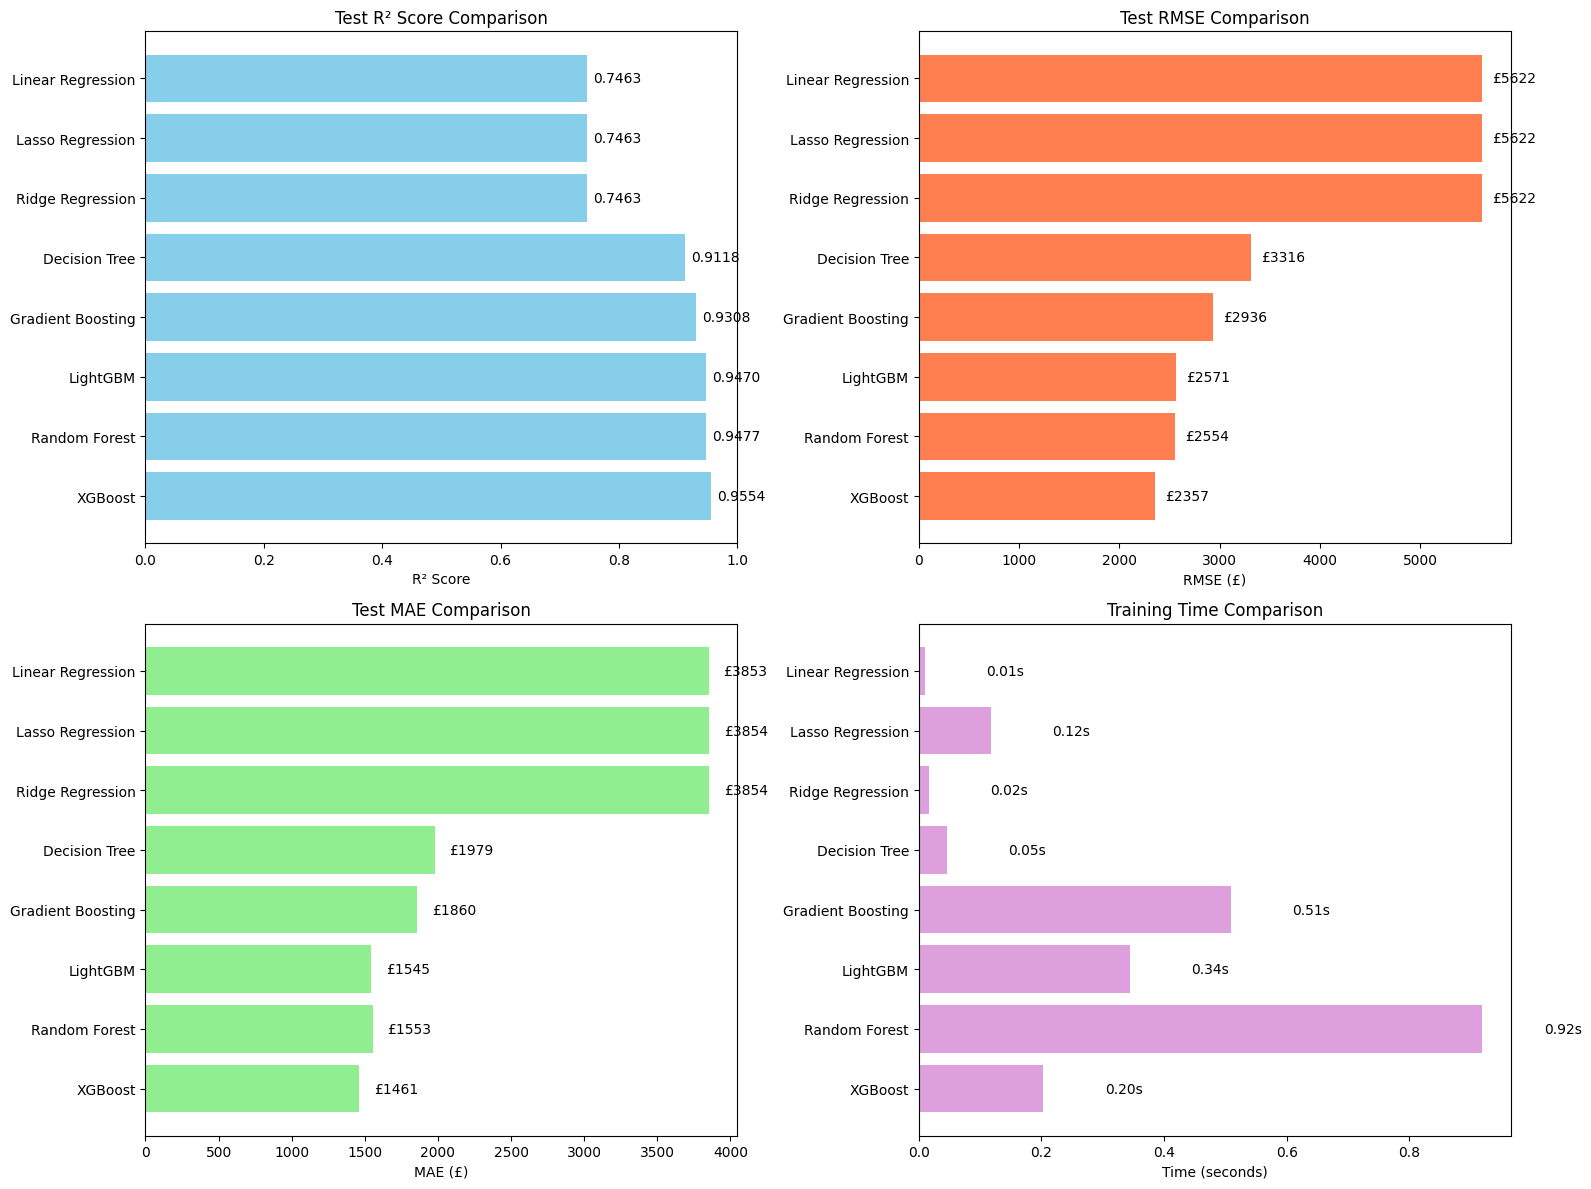

In [111]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# R² Score comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['Test R²'], color='skyblue')
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].set_title('Test R² Score Comparison')
axes[0, 0].set_xlim([0, 1])
for i, v in enumerate(comparison_df['Test R²']):
    axes[0, 0].text(v + 0.01, i, f'{v:.4f}', va='center')

# RMSE comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['Test RMSE'], color='coral')
axes[0, 1].set_xlabel('RMSE (£)')
axes[0, 1].set_title('Test RMSE Comparison')
for i, v in enumerate(comparison_df['Test RMSE']):
    axes[0, 1].text(v + 100, i, f'£{v:.0f}', va='center')

# MAE comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['Test MAE'], color='lightgreen')
axes[1, 0].set_xlabel('MAE (£)')
axes[1, 0].set_title('Test MAE Comparison')
for i, v in enumerate(comparison_df['Test MAE']):
    axes[1, 0].text(v + 100, i, f'£{v:.0f}', va='center')

# Training time comparison
axes[1, 1].barh(comparison_df['Model'], comparison_df['Training Time'], color='plum')
axes[1, 1].set_xlabel('Time (seconds)')
axes[1, 1].set_title('Training Time Comparison')
for i, v in enumerate(comparison_df['Training Time']):
    axes[1, 1].text(v + 0.1, i, f'{v:.2f}s', va='center')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
# Select best model based on Test R²
best_model_name = comparison_df.iloc[0]['Model']
print(f"\nBest Model (before tuning): {best_model_name}")
print(f"Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")

# Hyperparameter tuning for XGBoost
print("\n--- Tuning XGBoost ---")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

print("Parameter Grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

xgb_tuned = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(xgb_tuned, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

print("\nPerforming Grid Search with 5-fold Cross Validation...")
print("Note: This may take several minutes due to extensive parameter combinations...")
grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
best_xgb_model = grid_search.best_estimator_
y_train_pred_tuned = best_xgb_model.predict(X_train)
y_test_pred_tuned = best_xgb_model.predict(X_test)

train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)
test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
test_mae_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
test_mape_tuned = np.mean(np.abs((y_test - y_test_pred_tuned) / y_test)) * 100

print("\n--- Tuned Model Performance ---")
print(f"Train R²: {train_r2_tuned:.4f}")
print(f"Test R²: {test_r2_tuned:.4f}")
print(f"Test RMSE: £{test_rmse_tuned:.2f}")
print(f"Test MAE: £{test_mae_tuned:.2f}")
print(f"Test MAPE: {test_mape_tuned:.2f}%")



Best Model (before tuning): XGBoost
Test R²: 0.9554

--- Tuning XGBoost ---
Parameter Grid:
  n_estimators: [100, 200, 300]
  max_depth: [3, 5, 7, 10]
  learning_rate: [0.01, 0.05, 0.1, 0.2]
  subsample: [0.8, 0.9, 1.0]
  colsample_bytree: [0.8, 0.9, 1.0]
  min_child_weight: [1, 3, 5]
  gamma: [0, 0.1, 0.2]

Performing Grid Search with 5-fold Cross Validation...
Note: This may take several minutes due to extensive parameter combinations...
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best CV R² Score: 0.9479

--- Tuned Model Performance ---
Train R²: 0.9784
Test R²: 0.9505
Test RMSE: £2483.86
Test MAE: £1452.89
Test MAPE: 6.58%



Feature Importance:
             Feature  Importance
             car_age    0.339196
          engineSize    0.315174
                year    0.174607
       model_encoded    0.060212
             mileage    0.031860
                 mpg    0.029195
    fuelType_encoded    0.024833
                 tax    0.013993
transmission_encoded    0.010931


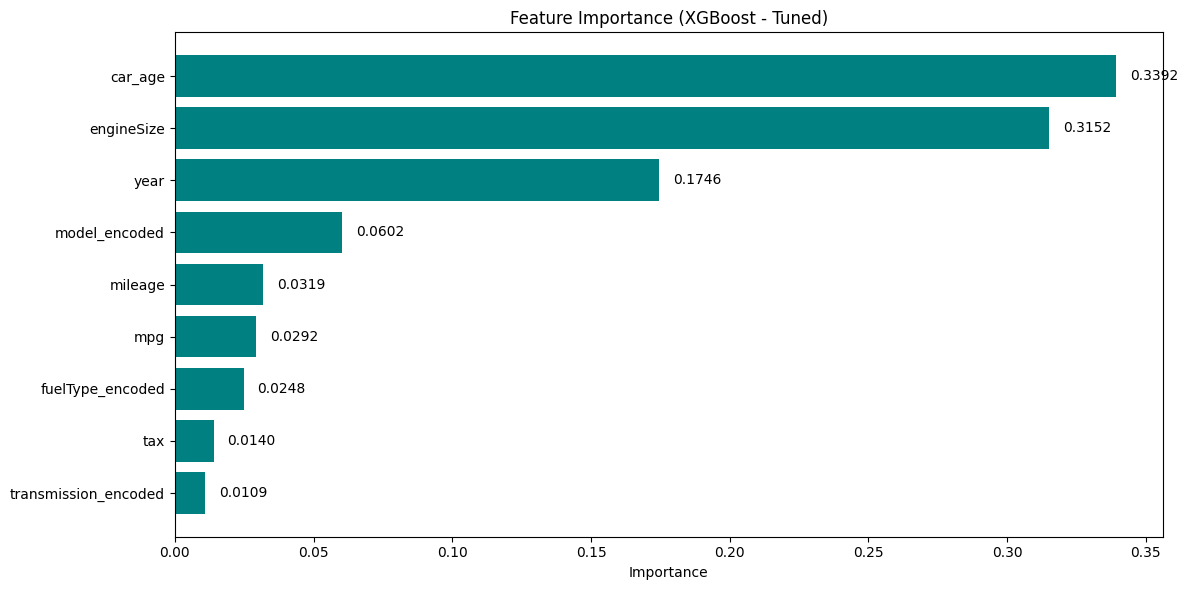

In [115]:
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='teal')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost - Tuned)')
plt.gca().invert_yaxis()

for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

In [116]:
# =====================================================
print("\n" + "=" * 60)
print("STEP 7: HYPERPARAMETER TUNING")
print("=" * 60)

# Select best model based on Test R²
best_model_name = comparison_df.iloc[0]['Model']
print(f"\nBest Model (before tuning): {best_model_name}")
print(f"Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")

# Hyperparameter tuning for Random Forest (typically the best performer)
print("\n--- Tuning Random Forest ---")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("Parameter Grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

rf_tuned = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring='r2', 
                           n_jobs=-1, verbose=1)

print("\nPerforming Grid Search with 5-fold Cross Validation...")
grid_search.fit(X_train, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
best_rf_model = grid_search.best_estimator_
y_train_pred_tuned = best_rf_model.predict(X_train)
y_test_pred_tuned = best_rf_model.predict(X_test)

train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
test_r2_tuned = r2_score(y_test, y_test_pred_tuned)
test_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
test_mae_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
test_mape_tuned = np.mean(np.abs((y_test - y_test_pred_tuned) / y_test)) * 100

print("\n--- Tuned Model Performance ---")
print(f"Train R²: {train_r2_tuned:.4f}")
print(f"Test R²: {test_r2_tuned:.4f}")
print(f"Test RMSE: £{test_rmse_tuned:.2f}")
print(f"Test MAE: £{test_mae_tuned:.2f}")
print(f"Test MAPE: {test_mape_tuned:.2f}%")



STEP 7: HYPERPARAMETER TUNING

Best Model (before tuning): XGBoost
Test R²: 0.9554

--- Tuning Random Forest ---
Parameter Grid:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, 30, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']

Performing Grid Search with 5-fold Cross Validation...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best CV R² Score: 0.9438

--- Tuned Model Performance ---
Train R²: 0.9810
Test R²: 0.9464
Test RMSE: £2583.35
Test MAE: £1486.81
Test MAPE: 6.79%



STEP 8: FEATURE IMPORTANCE ANALYSIS

Feature Importance:
             Feature  Importance
                year    0.176112
          engineSize    0.160465
             car_age    0.158173
             mileage    0.157467
                 mpg    0.148298
       model_encoded    0.140219
                 tax    0.038294
transmission_encoded    0.010491
    fuelType_encoded    0.010481


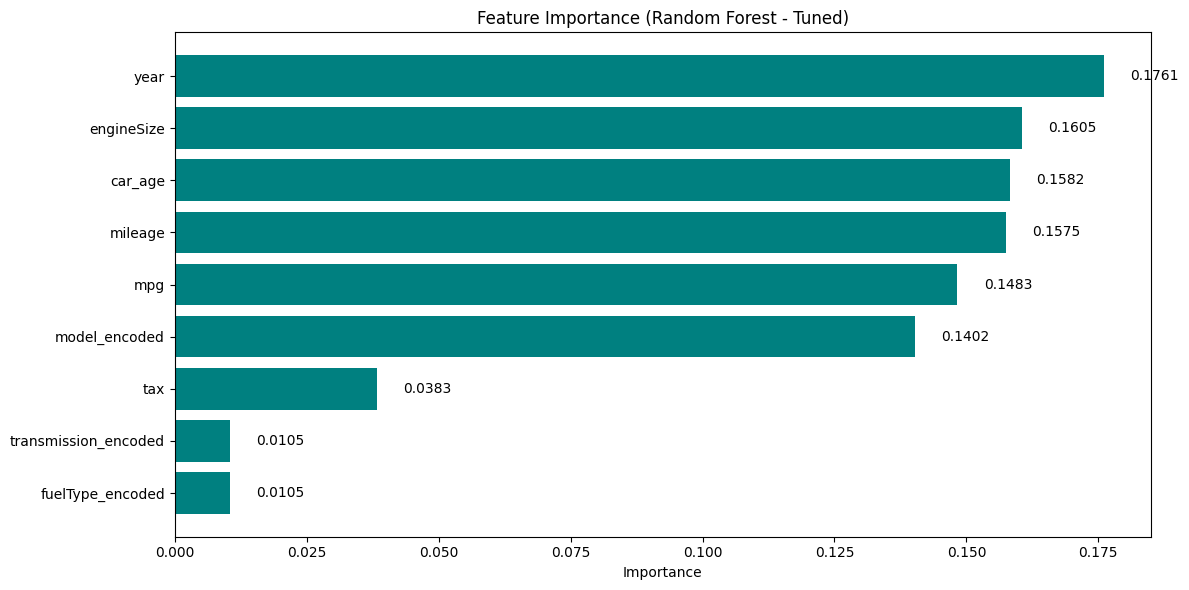

In [117]:
print("\n" + "=" * 60)
print("STEP 8: FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importance)), feature_importance['Importance'], color='teal')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest - Tuned)')
plt.gca().invert_yaxis()

for i, v in enumerate(feature_importance['Importance']):
    plt.text(v + 0.005, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()
